In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.feature_selection import f_classif,SelectKBest




In [2]:
data=pd.read_csv('loan_data.csv')
df_data=pd.DataFrame(data)
df_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
encoder=LabelEncoder()
df_data['person_gender']=encoder.fit_transform(df_data['person_gender'])
df_data['previous_loan_defaults_on_file']=encoder.fit_transform(df_data['previous_loan_defaults_on_file'])

In [29]:
df_data['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [4]:
df_data['person_education']=df_data['person_education'].map({'Master':3, 'High School':1, 'Bachelor':0, 'Associate':2, 'Doctorate':4})


In [5]:
df_data['person_home_ownership']=df_data['person_home_ownership'].map({'RENT':0, 'OWN':1, 'MORTGAGE':2, 'OTHER':3})
df_data['loan_intent']=df_data['loan_intent'].map({'PERSONAL':0, 'EDUCATION':1, 'MEDICAL':2, 'VENTURE':3, 'HOMEIMPROVEMENT':4,
       'DEBTCONSOLIDATION':5})

In [6]:
df_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,3,71948.0,0,0,35000.0,0,16.02,0.49,3.0,561,0,1
1,21.0,0,1,12282.0,0,1,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,1,12438.0,3,2,5500.0,2,12.87,0.44,3.0,635,0,1
3,23.0,0,0,79753.0,0,0,35000.0,2,15.23,0.44,2.0,675,0,1
4,24.0,1,3,66135.0,1,0,35000.0,2,14.27,0.53,4.0,586,0,1


In [93]:
df_data['f3']=df_data['person_home_ownership']*df_data['previous_loan_defaults_on_file']*df_data['loan_int_rate']*df_data['loan_percent_income']

In [97]:
df_data=df_data.drop('f3',axis=1)

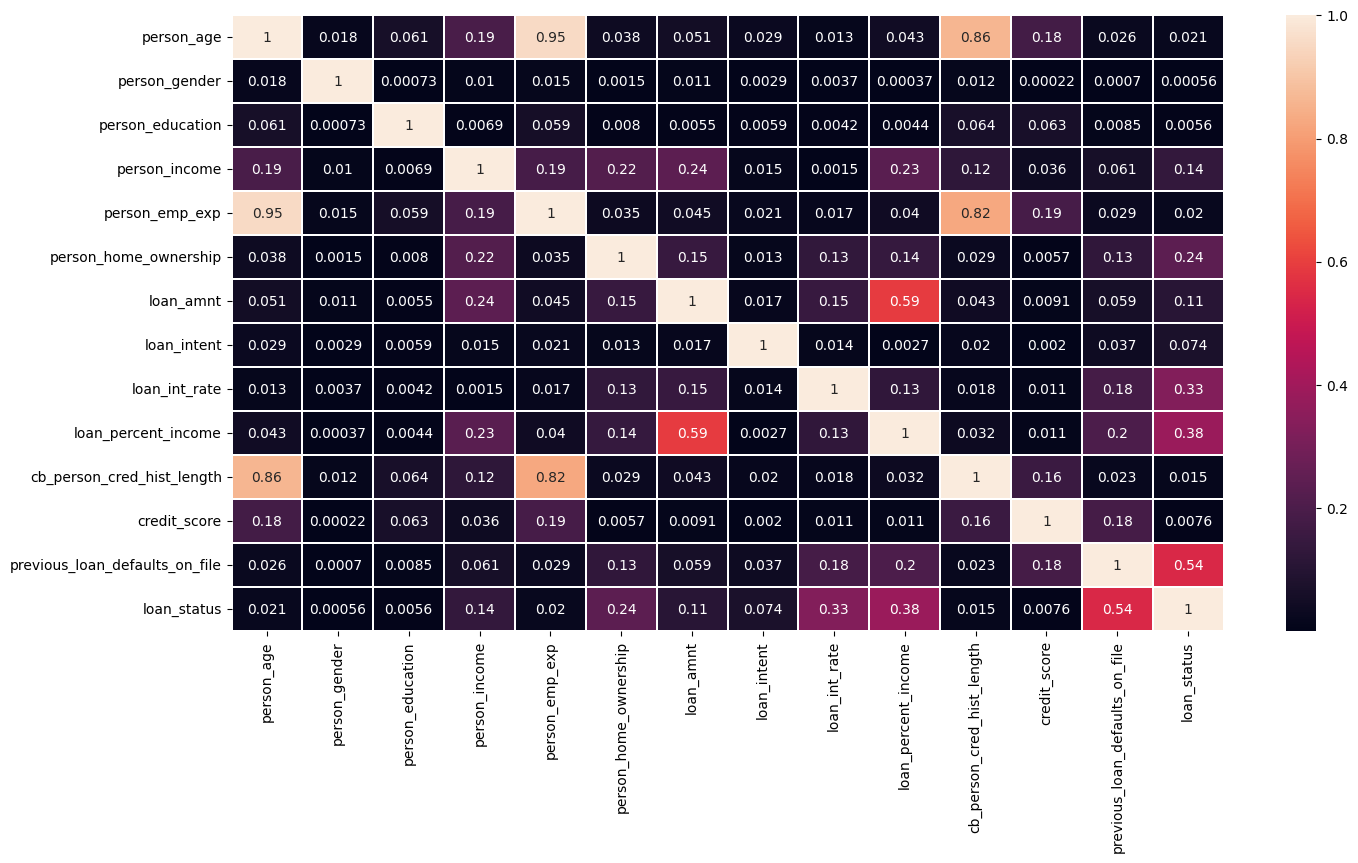

In [7]:
plt.figure(figsize=(16,8))
sns.heatmap(df_data.corr().abs(),annot=True,linewidths=0.25)
plt.show()

In [8]:
cols_to_add=['person_income', 'person_home_ownership', 'loan_int_rate',
       'loan_percent_income', 'previous_loan_defaults_on_file']
x=df_data.drop(['person_education','person_gender','credit_score','cb_person_cred_hist_length','loan_status','person_emp_exp','person_age'],axis=1)
#x=df_data.drop('loan_status',axis=1)
y=df_data['loan_status']

In [9]:

kbest=SelectKBest(score_func=f_classif,k=6)
xnew=kbest.fit_transform(x,y)
selected=kbest.get_support(indices=True)
feature=df_data.columns[selected]
feature

Index(['person_age', 'person_gender', 'person_education', 'person_emp_exp',
       'person_home_ownership', 'loan_amnt'],
      dtype='object')

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
models=[]
models.append(("Naive Bayes",GaussianNB()))
models.append(("RandomForestClassifier",RandomForestClassifier()))
models.append(('KNeighborsClassifier',KNeighborsClassifier(n_neighbors=5)))
models.append(('Decision tree',DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
))

for name , model in models:
    print(name,model)
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print(confusion_matrix(y_test,y_predict))
    print('accuracy_score',accuracy_score(y_test,y_predict))
    print('precision_score',precision_score(y_test,y_predict))
    print('recall score',recall_score(y_test,y_predict))
    print('f1_score',f1_score(y_test,y_predict))
    print()
    

Naive Bayes GaussianNB()
[[8389  341]
 [1820  700]]
accuracy_score 0.8079111111111111
precision_score 0.6724303554274735
recall score 0.2777777777777778
f1_score 0.39314799213704016

RandomForestClassifier RandomForestClassifier()
[[8447  283]
 [ 512 2008]]
accuracy_score 0.9293333333333333
precision_score 0.8764731558271497
recall score 0.7968253968253968
f1_score 0.8347536894616504

KNeighborsClassifier KNeighborsClassifier()
[[8054  676]
 [1217 1303]]
accuracy_score 0.8317333333333333
precision_score 0.6584133400707428
recall score 0.5170634920634921
f1_score 0.5792398310735719

Decision tree DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
[[8482  248]
 [ 743 1777]]
accuracy_score 0.9119111111111111
precision_score 0.8775308641975309
recall score 0.7051587301587302
f1_score 0.7819581958195819



In [101]:
rand=RandomForestClassifier()
param_grid={'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    }
model=RandomizedSearchCV(rand,param_distributions=param_grid,n_iter=10,cv=5,scoring="accuracy")
model.fit(x_train,y_train)



KeyboardInterrupt: 

In [ ]:
ypred=model.predict(x_test)
accuracy_score(ypred,y_test)

IndexError: Inconsistent shape between the condition and the input (got (100, 1) and (100,))

<Figure size 1600x800 with 0 Axes>